In [14]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)
%matplotlib inline

reloaded


reloaded
D:\measuring\data\ionization_LT4_yellow\20170629\081009_single_click_ent_111no2_SIL2_ionization_study
None
1
starting fit.fit1d
Converged with chi squared  0.00180520199161
degrees of freedom, dof  6
RMS of residuals (i.e. sqrt(chisq/dof))  0.0173455181128
Reduced chisq (i.e. variance of residuals)  0.000300866998601

fitted parameters at minimum, with 68% C.I.:
 0 A              0.953850 +/-   0.011394
 1 T          33988.673025 +/- 9435.836031

correlation matrix:
               A         T         
         A  1.000000
         T -0.829755  1.000000

D:\measuring\data\ionization_LT4_yellow\20170629\081009_single_click_ent_111no2_SIL2_ionization_study


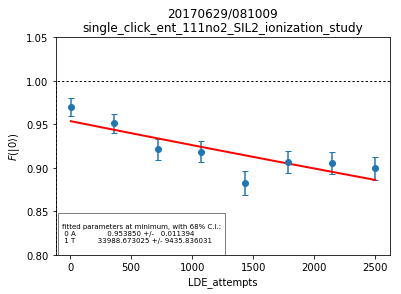

D:\measuring\data\ionization_LT4_yellow\20170629\082913_single_click_ent_111no2_SIL2_ionization_study
None
1
starting fit.fit1d
Converged with chi squared  0.00074955407633
degrees of freedom, dof  6
RMS of residuals (i.e. sqrt(chisq/dof))  0.0111770156745
Reduced chisq (i.e. variance of residuals)  0.000124925679388

fitted parameters at minimum, with 68% C.I.:
 0 A              0.970170 +/-   0.007249
 1 T          261213.447515 +/- 341944.744234

correlation matrix:
               A         T         
         A  1.000000
         T -0.836642  1.000000

D:\measuring\data\ionization_LT4_yellow\20170629\082913_single_click_ent_111no2_SIL2_ionization_study


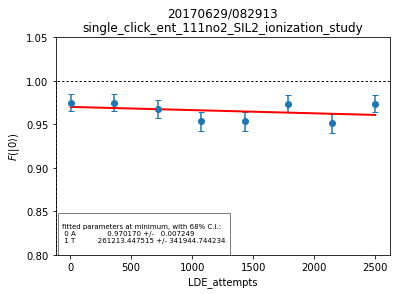

In [38]:
reload(fits)
base_f = r'D:\measuring\data\ionization_LT4_yellow'
### all data were taken on LT4 29-06-2017
kws = {'base_folder' : base_f, 'offset':[0.0], 'amplitude': [0.47], 'center' : [0], 'decay_constant': [10000], 
                      'exp_power' : [1],
                      'frequency' : [0.], 'phase' : [0], 
                      'fixed' : [0,2,4,5,6],
                      'ylim' : [0.8,1.05],
                      'plot_fit' : True, 'do_print' :True, 'show_guess' : False,
                     'correct_ionization' : False}
Result_1nW = fits.exp_sin(timestamp=  None, contains = '081009',**kws)[0]
Result_50nW = fits.exp_sin(timestamp=  None, contains = '082913',**kws)[0]

###params
# 0 : offset|
# 1 : amplitude
# 2 : center
# 3 : decay_constant
# 4 : exp_power
# 5 : frequency
# 6 : phase

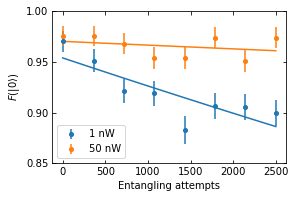

In [46]:

fig,(ax) = plt.subplots(1,figsize = (6*0.7,4*0.7))
xfit = np.linspace(0,2500,100)
plt.errorbar(Result_1nW['x'],Result_1nW['y'],Result_1nW['y_u'],label = '1 nW',fmt = 'o',markersize = 4)
plt.errorbar(Result_50nW['x'],Result_50nW['y'],Result_50nW['y_u'],label = '50 nW',fmt = 'o',markersize = 4)
plt.plot(xfit,Result_1nW['fitfunc'](xfit),color = 'tab:blue')
plt.plot(xfit,Result_50nW['fitfunc'](xfit),color = 'tab:orange')
plt.legend()
plt.ylabel(r'$F(|0\rangle)$')
plt.xlabel('Entangling attempts')
plt.ylim([0.85,1.0])
plt.yticks([0.85,0.9,0.95,1])

plt.savefig(os.path.join(r'D:/measuring/data/ionization_LT4_yellow','ionization_LT4.pdf'),
        format='pdf')